# Question 2: KNN
# [CM 6] Accuracy, AUC, F-score of the kNN classifier

Importing all necessary libraries.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# For Iris Dataset

#### The bestfit for Iris dataset is achieved at K=5 (as computed in [CM5]), so all the computations are done on this value.

In [35]:
df_iris = pd.read_csv("cleaned_data_iris.csv")
df_iris.species = df_iris.species.replace("Iris-setosa",0).replace("Iris-versicolor",1).replace("Iris-virginica",2)
x = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]
knn_iris = KNeighborsClassifier(n_neighbors=5)
accuracy_score = cross_val_score(knn_iris,x,y,cv=5)
y_pred = cross_val_predict(knn_iris,x,y,cv=5)


### Accuracy Iris Data:

In [36]:
print('Accuracy of Iris dataset is:', np.round(np.mean(accuracy_score)*100,2),'%')

Accuracy of Iris dataset is: 97.14 %


### F-score Iris Data:

In [37]:
from sklearn.metrics import f1_score

fsc = f1_score(y , y_pred,average='micro')
print('F-score of Iris dataset is:',fsc)

F-score of Iris dataset is: 0.9714285714285714


### AUC Iris Data:

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

encode = OneHotEncoder()
y_encode = encode.fit_transform(np.array(y).reshape(-1,1)).todense()
pred_encode = encode.fit_transform(y_pred.reshape(-1,1)).todense()
auc_iris = roc_auc_score(y_encode,pred_encode)
print('AUC value of iris dataset is:', auc_iris)

AUC value of iris dataset is: 0.9785714285714286


In [39]:
from sklearn.multiclass import OneVsRestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=98)

In [40]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
pred1 = clf.predict(x_test)
pred1_prob = clf.predict_proba(x_test)

In [41]:
fpr = {}
tpr = {}
thresh = {}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred1_prob[:,i], pos_label=i)

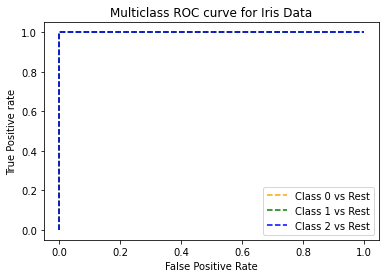

In [42]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve for Iris Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### In the Iris dataset,the accuracy increases with the increasing value of k and reaches its highest value at k=5. It remains stable between k = [5,10] after which it starts decreasing. The increasing value of K reduces the accuracy since the model is unable to differentiate between the classes. Thus, based on these observations k=5 is selected as the best fitting parameter.

# For Heart Disease Dataset

In [43]:
df_heart = pd.read_csv("heart_disease_cleaned.csv")

#### The bestfit for heartdisease dataset was achieved at K=14 (as computed in [CM5]), so all reportings are done at this value

In [44]:
ip_train,ip_test,op_train,op_test = train_test_split(df_heart.iloc[:,:-1],df_heart.iloc[:,-1],test_size=0.2,random_state=98)
knn_heart = KNeighborsClassifier(n_neighbors=14)
knn_heart.fit(ip_train,op_train)
heart_pred = knn_heart.predict(ip_test)
heart_prob = knn_heart.predict_proba(ip_test)
heart_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Accuracy Heart Data:

In [47]:
heart_accuracy = accuracy_score(heart_pred,op_test)
print("Accuracy of heartdisease dataset is:", np.round(heart_accuracy*100,2),'%')

Accuracy of heartdisease dataset is: 72.73 %


### F-Score Heart Disease

In [48]:
fsc = f1_score(op_test,heart_pred,average='micro')
print('F-score of heart disease dataset is:', fsc)

F-score of heart disease dataset is: 0.7272727272727273


### AUC Heart Data

In [51]:
from sklearn.metrics import roc_auc_score
auc_heart = roc_auc_score(op_test,heart_pred,average='weighted')
print('AUC of heart disease dataset is:', auc_heart)

AUC of heart disease dataset is: 0.7480769230769232


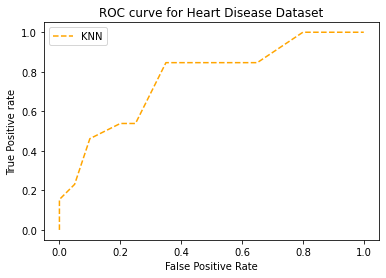

In [52]:
from sklearn.metrics import roc_curve
# roc curve
fpr1, tpr1, thresh1 = roc_curve(op_test,heart_prob[:,1], pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.title('ROC curve for Heart Disease Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

### In Heart disease dataset, the accuracy increases with the increasing value of K and achieves max value at k=11. However, this is the case of overfitting due to limited values of validation set and cannot be considered. Thus, K=14 is selected after testing the data.